In [3]:
from typing_extensions import TypedDict 
from typing import Literal

import random

class TypedDictState(TypedDict):
    name: str
    game: Literal["Cricket", "badminton"]
    

In [4]:
def start_play(state:TypedDictState) -> TypedDictState: 
    print("Start_Play has been called")
    return {"name": state["name"] + " is planning to Play - "}

def cricket(state:TypedDictState) -> TypedDictState: 
    print("My Cricket node has been called")
    return {"name": state["name"] + " cricket.", "game": "cricket"}

def badminton(state:TypedDictState) -> TypedDictState: 
    print("My Badminton node has been called")
    return {"name": state["name"] + " badminton.", "game": "badminton"}

def decide_game(state: TypedDictState) -> Literal["cricket", "badminton"]:
    print("Decide_game has been called")
    if random.random() > 0.5: 
        return "cricket"
    else:
        return "badminton"


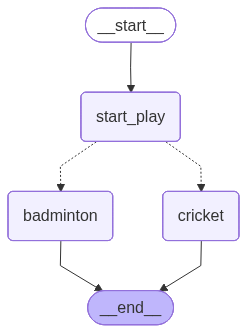

In [5]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

builder = StateGraph(TypedDictState)
builder.add_node("start_play", start_play)
builder.add_node("cricket", cricket)
builder.add_node("badminton", badminton)

builder.add_edge(START, "start_play")
builder.add_conditional_edges("start_play", decide_game)
builder.add_edge("cricket", END)
builder.add_edge("badminton", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))



In [14]:
graph.invoke({"name": "Jayant"})

Start_Play has been called
Decide_game has been called
My Cricket node has been called


{'name': 'Jayant is planning to Play -  cricket.', 'game': 'cricket'}

In [15]:
from dataclasses import dataclass

@dataclass
class DataClassState:
    name: str
    game: Literal["Cricket", "badminton"]

In [16]:
def play_game(state:DataClassState):
    print("---Play Game node has been called--")
    return {"name":state.name + " want to play "}

def cricket(state:DataClassState):
    print("-- Cricket node has been called--")
    return {"name":state.name + " cricket","game":"cricket"}

def badminton(state:DataClassState):
    print("-- badminton node has been called--")
    return {"name":state.name + " badminton","game":"badminton"}

In [17]:
import random
def decide_play(state:DataClassState)->Literal["cricket","badminton"]:
    # Here, let's just do a 50 / 50 split between nodes 2, 3
    if random.random() < 0.5:
        return "cricket"
    else:
        return "badminton"

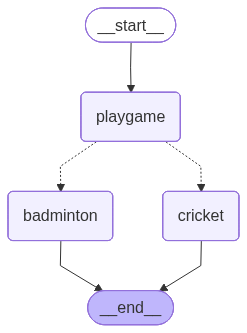

In [18]:
builder=StateGraph(DataClassState)
builder.add_node("playgame",play_game)
builder.add_node("cricket",cricket)
builder.add_node("badminton",badminton)

## Flow of the graph

builder.add_edge(START,"playgame")
builder.add_conditional_edges("playgame",decide_play)
builder.add_edge("cricket",END)
builder.add_edge("badminton",END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [19]:
graph.invoke(DataClassState(name="KRish",game="cricket"))

---Play Game node has been called--
-- Cricket node has been called--


{'name': 'KRish want to play  cricket', 'game': 'cricket'}